Energy Monitoring & Reporting Dashboard for Wind Turbines

In [18]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

# Parameters
start_date = "2025-06-01"
end_date = "2025-06-30 23:00"
turbines = ['T1', 'T2', 'T3', 'T4', 'T5']

# Create hourly timestamps
timestamps = pd.date_range(start=start_date, end=end_date, freq='h', inclusive='both')
data = []

for ts in timestamps:
    for t in turbines:
        wind_speed = np.round(np.random.uniform(3, 25), 2)
        power_output = np.round(wind_speed**3 / 100, 2) if wind_speed >= 3 else 0  # basic cubic formula
        temperature = np.round(np.random.uniform(15, 45), 1)
        downtime = 0 if np.random.rand() > 0.95 else np.random.choice([0, 5, 10, 15], p=[0.9, 0.03, 0.04, 0.03])
        data.append([ts, t, wind_speed, power_output, temperature, downtime])

df = pd.DataFrame(data, columns=['Timestamp', 'Turbine_ID', 'Wind_Speed', 'Power_Output', 'Temperature', 'Downtime'])

# Save to CSV
df.to_csv("wind_turbine_data.csv", index=False)

print("✅ Wind turbine data generated and saved as 'wind_turbine_data.csv'")


✅ Wind turbine data generated and saved as 'wind_turbine_data.csv'


In [5]:
import pandas as pd

In [6]:
df = pd.read_csv("wind_turbine_data.csv")

In [19]:
df.shape

(3600, 6)

In [9]:
df.columns

Index(['Timestamp', 'Turbine_ID', 'Wind_Speed', 'Power_Output', 'Temperature',
       'Downtime'],
      dtype='object')

In [10]:
df.dtypes

Timestamp        object
Turbine_ID       object
Wind_Speed      float64
Power_Output    float64
Temperature     float64
Downtime          int64
dtype: object

In [12]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

In [13]:
df.isnull().sum()

Timestamp       0
Turbine_ID      0
Wind_Speed      0
Power_Output    0
Temperature     0
Downtime        0
dtype: int64

In [14]:
df.describe

<bound method NDFrame.describe of       Timestamp Turbine_ID  Wind_Speed  Power_Output  Temperature  Downtime
0    2025-06-01         T1       18.19         60.19         36.6         0
1    2025-06-01         T2        5.53          1.69         25.1         0
2    2025-06-01         T3        5.18          1.39         18.6         0
3    2025-06-01         T4       21.08         93.67         44.1         0
4    2025-06-01         T5        8.97          7.22         32.2         0
...         ...        ...         ...           ...          ...       ...
3480 2025-06-30         T1       22.17        108.97         34.3         0
3481 2025-06-30         T2       13.85         26.57         28.4         0
3482 2025-06-30         T3       18.09         59.20         26.3         0
3483 2025-06-30         T4       15.09         34.36         16.6         0
3484 2025-06-30         T5       18.10         59.30         43.3         0

[3485 rows x 6 columns]>

In [16]:
df.head()

,Timestamp,Turbine_ID,Wind_Speed,Power_Output,Temperature,Downtime
0,2025-06-01,T1,18.19,60.19,36.6,0
1,2025-06-01,T2,5.53,1.69,25.1,0
2,2025-06-01,T3,5.18,1.39,18.6,0
3,2025-06-01,T4,21.08,93.67,44.1,0
4,2025-06-01,T5,8.97,7.22,32.2,0


In [20]:
df['Date'] = df['Timestamp'].dt.date
df['Hour'] = df['Timestamp'].dt.hour
df['Weekday'] = df['Timestamp'].dt.day_name()

 1. Total power output per turbine

In [21]:
total_power = df.groupby("Turbine_ID")["Power_Output"].sum().sort_values(ascending=False)
print("Total Power Output (kW):")
print(total_power)

Total Power Output (kW):
Turbine_ID
T3    32976.39
T5    31168.62
T2    30978.88
T4    30902.78
T1    30492.44
Name: Power_Output, dtype: float64


2. Average wind speed vs power output correlation

In [25]:
correlation = df[["Wind_Speed", "Power_Output"]].corr()
print("Correlation matrix:")
print(correlation)

Correlation matrix:
              Wind_Speed  Power_Output
Wind_Speed      1.000000      0.938323
Power_Output    0.938323      1.000000


 3. Total downtime per turbine

In [27]:
total_downtime = df.groupby("Turbine_ID")["Downtime"].sum().sort_values(ascending=False)
print("Total downtime (minutes):")
print(total_downtime)

Total downtime (minutes):
Turbine_ID
T4    805
T3    740
T1    715
T2    645
T5    585
Name: Downtime, dtype: int64


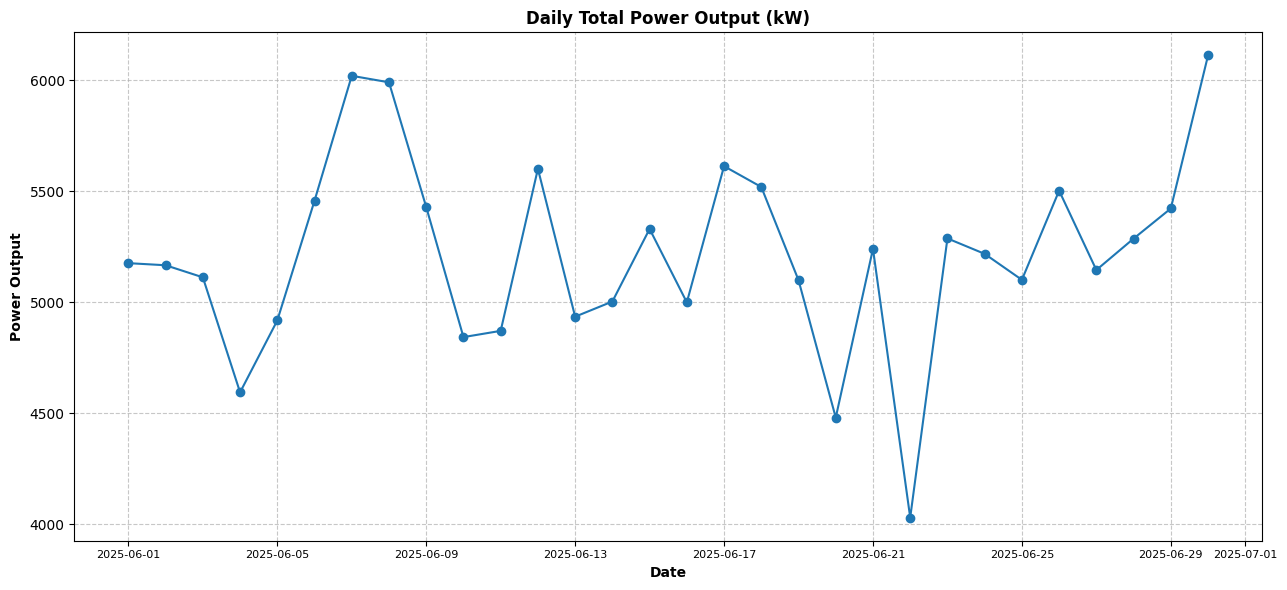

In [41]:
daily_power = df.groupby(df['Timestamp'].dt.date)["Power_Output"].sum()
 
import matplotlib.pyplot as plt 


plt.figure(figsize=(13,6))
plt.plot(daily_power.index, daily_power.values, marker='o', linestyle='-')
plt.title("Daily Total Power Output (kW)", fontweight='bold')
plt.xlabel("Date", fontweight='bold')
plt.ylabel("Power Output", fontweight='bold')

plt.xticks(fontsize=8)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [42]:
df = df.sort_values(by=["Turbine_ID", "Timestamp"])
df["Prev_Output"] = df.groupby("Turbine_ID")["Power_Output"].shift(1)
df["Drop_%"] = ((df["Prev_Output"] - df["Power_Output"]) / df["Prev_Output"]) * 100
anomalies = df[(df["Drop_%"] > 50) & (df["Prev_Output"] > 10)]  # avoid noise

print(f"😨 Found {len(anomalies)} sudden power drop anomalies")
anomalies[["Timestamp", "Turbine_ID", "Prev_Output", "Power_Output", "Drop_%"]].head()


😨 Found 1203 sudden power drop anomalies


,Timestamp,Turbine_ID,Prev_Output,Power_Output,Drop_%
10,2025-06-01 02:00:00,T1,114.97,54.89,52.257111
15,2025-06-01 03:00:00,T1,54.89,21.92,60.065586
35,2025-06-01 07:00:00,T1,98.55,29.74,69.822425
40,2025-06-01 08:00:00,T1,29.74,2.77,90.685945
60,2025-06-01 12:00:00,T1,141.72,2.18,98.461756


In [44]:
df.to_csv("Cleaned_wind_turbine_data.csv", index=False)
